## Phase Estimation

### References: https://github.com/qiskit-community/qiskit-textbook/blob/main/content/ch-algorithms/quantum-phase-estimation.ipynb   (textbook example of Qiskit textbook)

### 1.Initialize and set data

In [1]:
from funcs import *
from qiskit.circuit import ClassicalRegister
import math

In [2]:
n = 6        # qubits number
theta = 2*math.pi/3 # parameter of cp gate
# in this case, eigenvector is |1>, eigenvalue is e^(i*theta)

### 2.Map circuit

In [3]:
qc = QuantumCircuit(n+1)
qc.h(range(n))
qc.x(n)
for i in range(n):
    for j in range(2**i):
        qc.cp(theta, n-i-1, n)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=7, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 2), Qubit(QuantumRegister(7, 'q'), 3), Qubit(QuantumRegister(7, 'q'), 4), Qubit(QuantumRegister(7, 'q'), 5), Qubit(QuantumRegister(7, 'q'), 6)), clbits=())

In [4]:
qc.h(0)
for i in range(1, n):
    for j in range(0, i):
        qc.cp(-math.pi / (2 ** (i - j)), j, i)
    qc.h(i)
qc.barrier()


CircuitInstruction(operation=Instruction(name='barrier', num_qubits=7, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(7, 'q'), 0), Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 2), Qubit(QuantumRegister(7, 'q'), 3), Qubit(QuantumRegister(7, 'q'), 4), Qubit(QuantumRegister(7, 'q'), 5), Qubit(QuantumRegister(7, 'q'), 6)), clbits=())

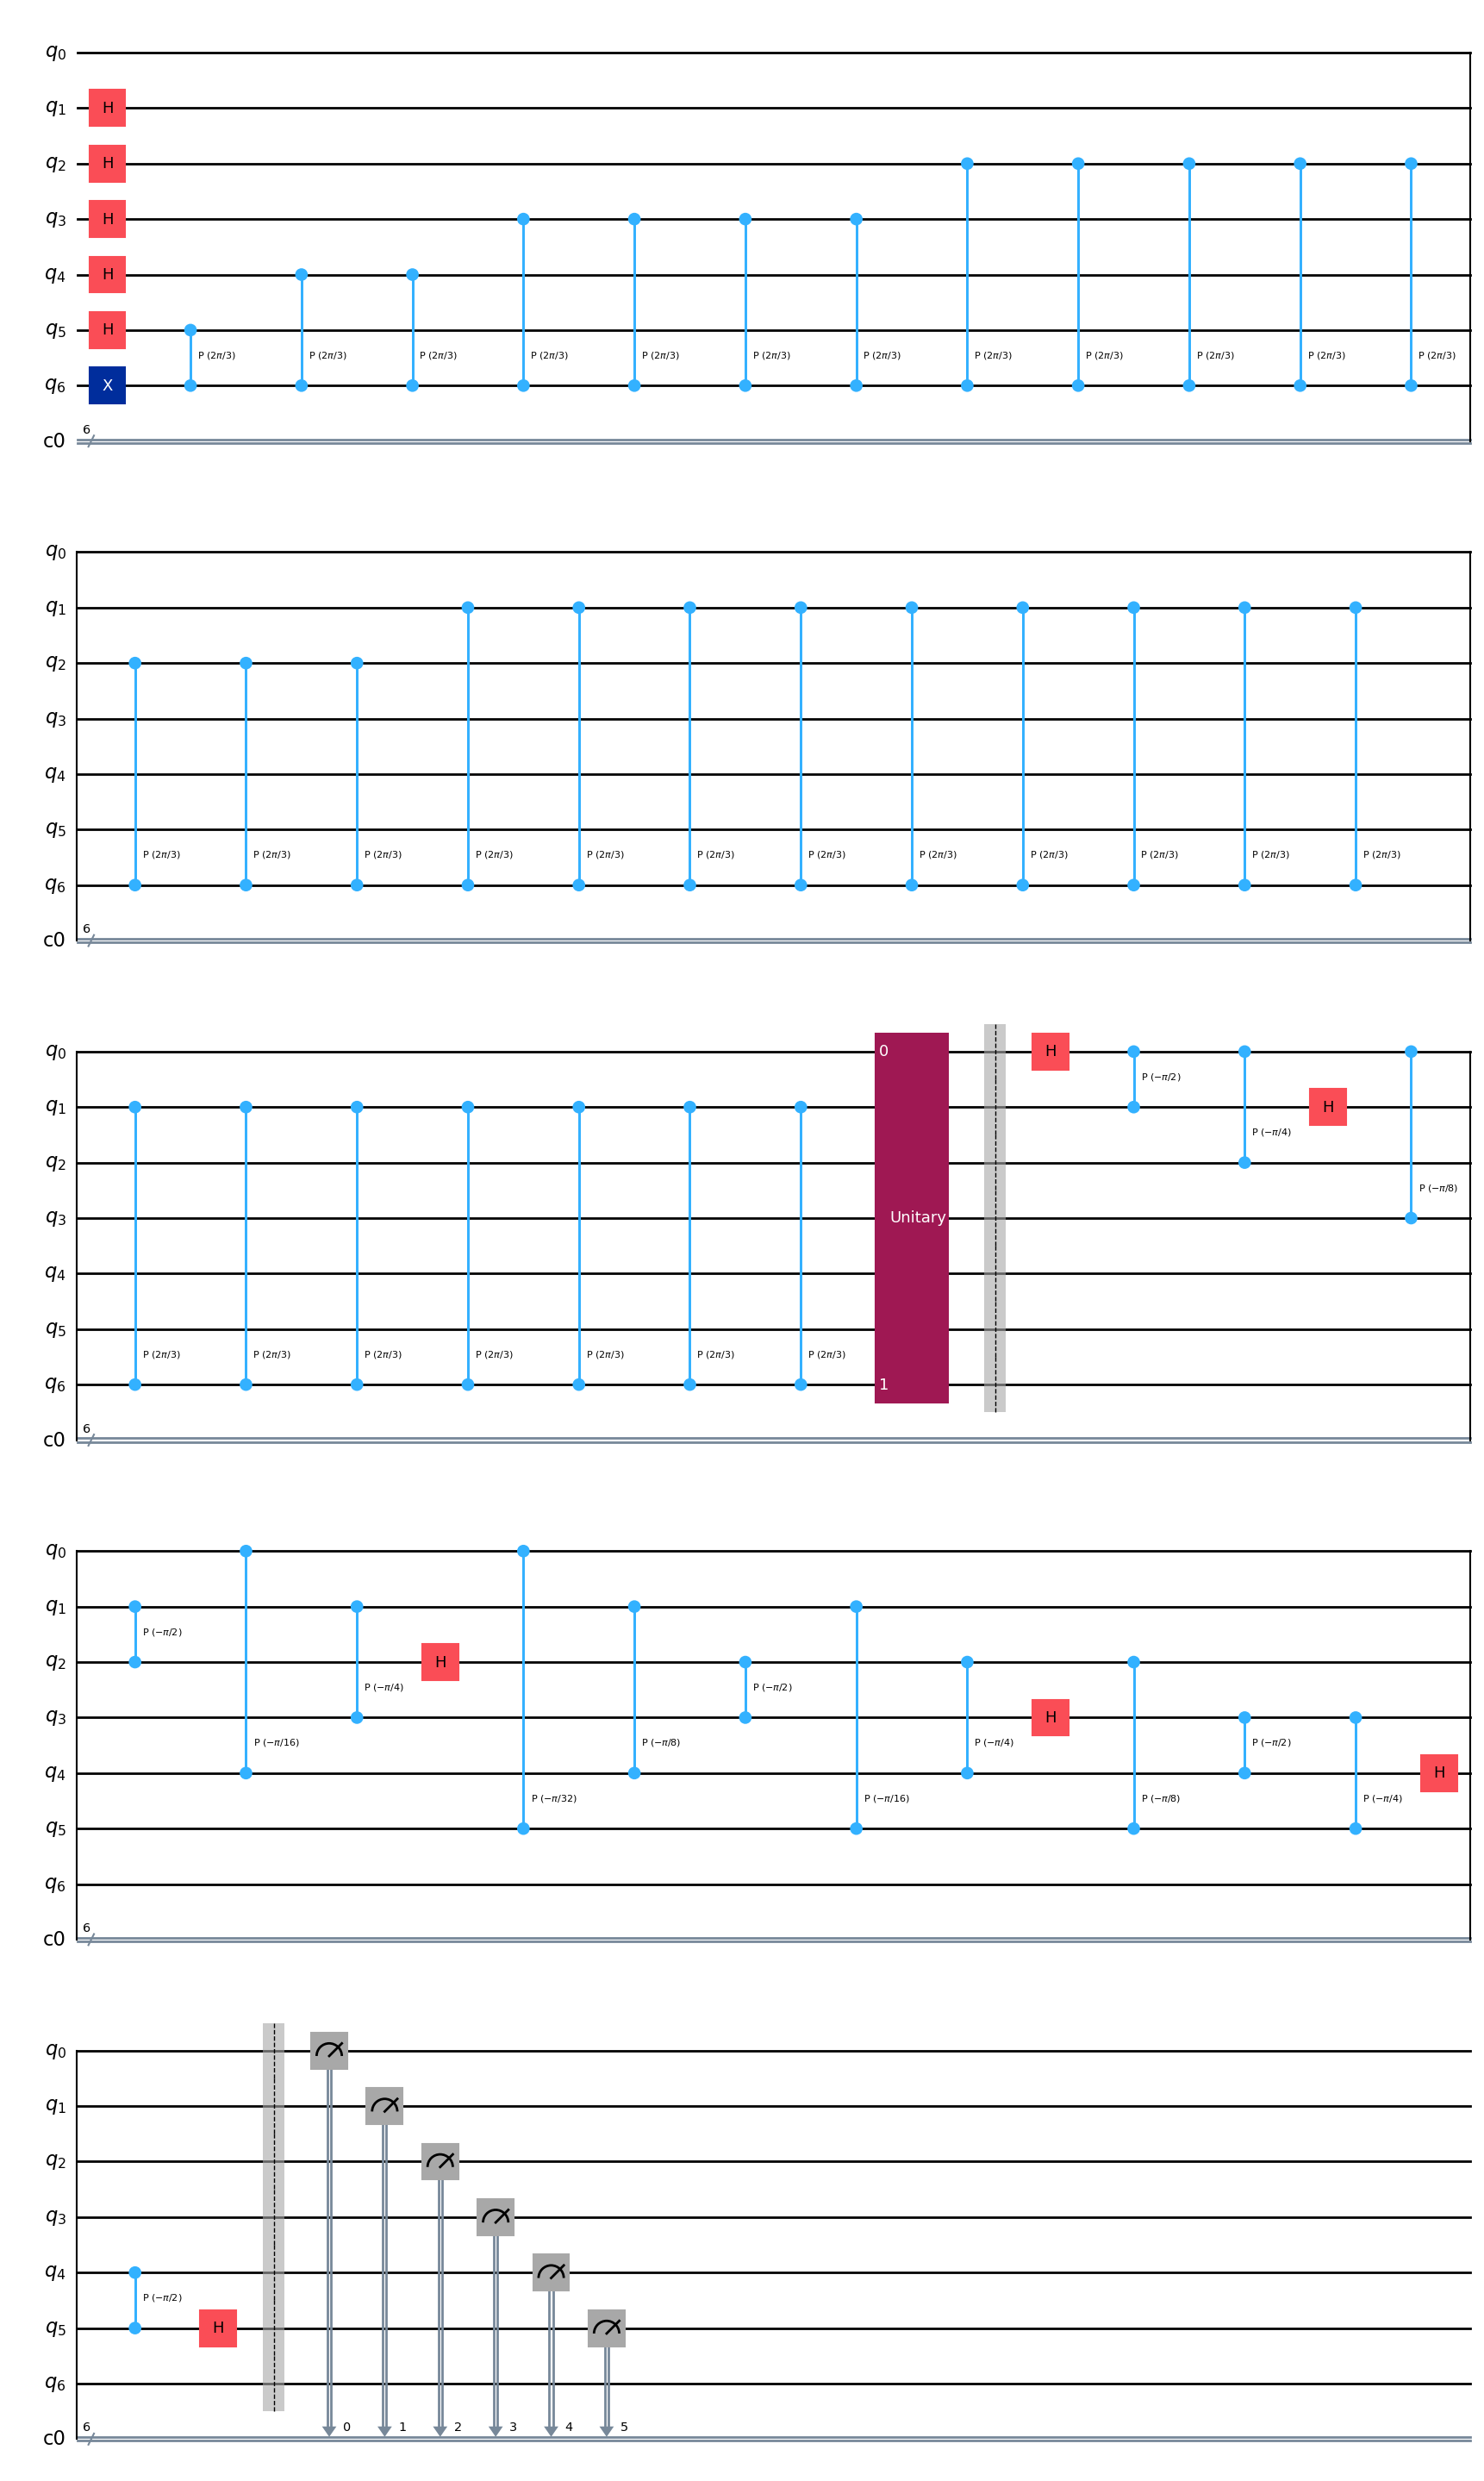

In [5]:
qc = transpile(qc, backend=AerSimulator(), optimization_level=3)
c = ClassicalRegister(n)
qc.add_register(c)
for i in range(n):
    qc.measure(i, c[i])
qc.draw(output='mpl')

### 3.execute and process the results

In [6]:
results = execute_qc(qc)

# find the most likely result and convert it to a decimal
result = max(results, key=results.get)
print('result:      ', result) 
est_phi = 0.0
for i in range(len(result)):
    if result[i] == '1':
        est_phi += 2**(-i-1)
print('estimation:  ', est_phi)
exp_phi = theta/(2*math.pi)
print('expectation: ', exp_phi)
print('error:       ', abs(est_phi - exp_phi))
print('precision:   ', 2**(-n))

result:       010101
estimation:   0.328125
expectation:  0.3333333333333333
error:        0.005208333333333315
precision:    0.015625


### 4.Test
#### Error should be less than precision